## Problem:
 ### Creating a model to Check the Quality of Red Wine. 🍷

 Data-Set Kaggle link: 
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

In [1]:
### Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('winequality-red.csv')   ## reading Data set
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.isnull().sum()  #checking for the missing values in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


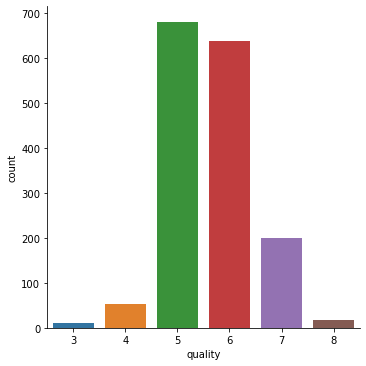

In [6]:
sns.catplot( data=df, x='quality', kind='count' )

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

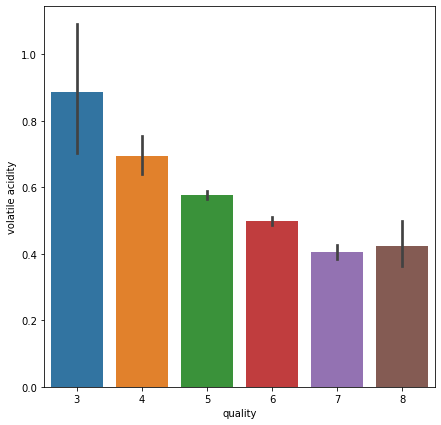

In [7]:
# volatile acidity vs quality
plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality', y='volatile acidity', data= df)

from the graph , it is clear that higher the volatile acidity, lower the quality.(they are inversly proportional)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

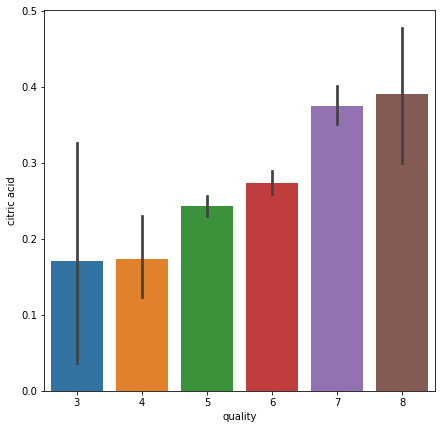

In [8]:
# citirc acid vs quality
plot = plt.figure(figsize=(7,7))
sns.barplot(x='quality', y='citric acid', data= df)

from the graph , it is clear that higher the citric acid, higher the quality.(they are directly proportional)

## Correlation of all features

In [9]:
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

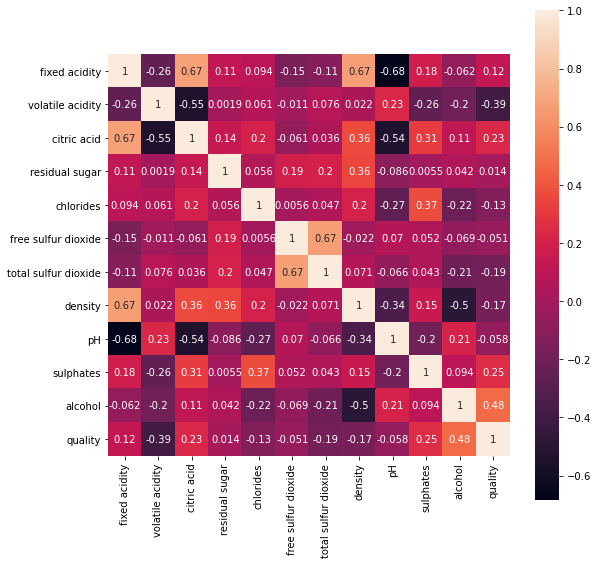

In [10]:
# plotting a heatmap to understand the correlation 
plt.figure(figsize=(9,9))
sns.heatmap(correlation, square=True,annot=True)

lighter the color , more the values are correlated and vice versa

## Data Preprocessing

In [11]:
X = df.drop('quality', axis =1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
# label Binarization(converting the different quality scores into two i.e. good(1) and bad(0))
y = df['quality'].apply(lambda y_value : 1 if y_value>=7 else 0 )
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [13]:
y.value_counts()   # data is imbalanced

0    1382
1     217
Name: quality, dtype: int64

In [14]:
# over-sampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [15]:
os=RandomOverSampler(sampling_strategy=0.75)
X_os,y_os = os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_os)))

The number of classes before fit Counter({0: 1382, 1: 217})
The number of classes after fit Counter({0: 1382, 1: 1036})


In [16]:
# 1036-217 = 819 , total 819 records of 1 are added by oversampling

In [17]:
y_os.value_counts()   # after handling imbalanced values

0    1382
1    1036
Name: quality, dtype: int64

In [18]:
X_os

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
2413,9.4,0.41,0.48,4.6,0.072,10.0,20.0,0.99730,3.34,0.79,12.2
2414,10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0
2415,7.6,0.31,0.34,2.5,0.082,26.0,35.0,0.99356,3.22,0.59,12.5
2416,9.1,0.25,0.34,2.0,0.071,45.0,67.0,0.99769,3.44,0.86,10.2


In [19]:
# feature selection by feature importance technique

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_os,y_os)

ExtraTreesClassifier()

In [20]:
print(model.feature_importances_) # importance of all features

[0.06872461 0.10942377 0.10077316 0.06333484 0.05868901 0.06265673
 0.07935269 0.07607898 0.05749446 0.10982125 0.2136505 ]


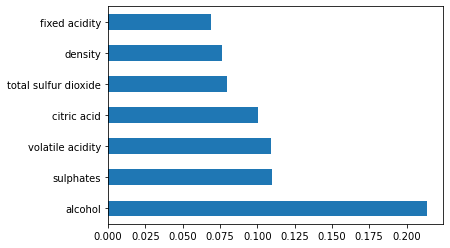

In [21]:
#selecting top 7 features
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(7).plot(kind='barh')
plt.show()

In [22]:
X_os = X_os.drop(['pH','free sulfur dioxide','chlorides','residual sugar'], axis = 1)


In [23]:
X_os

,fixed acidity,volatile acidity,citric acid,total sulfur dioxide,density,sulphates,alcohol
0,7.4,0.70,0.00,34.0,0.99780,0.56,9.4
1,7.8,0.88,0.00,67.0,0.99680,0.68,9.8
2,7.8,0.76,0.04,54.0,0.99700,0.65,9.8
3,11.2,0.28,0.56,60.0,0.99800,0.58,9.8
4,7.4,0.70,0.00,34.0,0.99780,0.56,9.4
...,...,...,...,...,...,...,...
2413,9.4,0.41,0.48,20.0,0.99730,0.79,12.2
2414,10.5,0.24,0.47,24.0,0.99780,0.90,11.0
2415,7.6,0.31,0.34,35.0,0.99356,0.59,12.5
2416,9.1,0.25,0.34,67.0,0.99769,0.86,10.2


In [24]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X_os,y_os, test_size=0.3, random_state=2)

In [25]:
print(y.shape , y_train.shape, y_test.shape)

(1599,) (1692,) (726,)


In [26]:
print(X.shape , X_train.shape, X_test.shape)

(1599, 11) (1692, 7) (726, 7)


In [27]:
X_test.shape

(726, 7)

## Model Training 

In [28]:
model = RandomForestClassifier()   # creating object of class

In [29]:
model.fit(X_train, y_train)  # training the model

RandomForestClassifier()

## Evaluation (Accuracy)

In [30]:
X_test_prediction = model.predict(X_test)

In [31]:
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
test_data_accuracy

0.9600550964187328

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       392
           1       0.93      0.99      0.96       334

    accuracy                           0.96       726
   macro avg       0.96      0.96      0.96       726
weighted avg       0.96      0.96      0.96       726



### If accuracy score is greater than 85% , then the accuracy is said to be good

# For Testing the model

In [34]:


  # 8.5,0.28,0.56,103.0,0.9969,0.75,10.5  - Good Quality wine's data


# input_data=(9.6,0.32,0.47,1.4,0.0559999994,9.0,24.0,0.99695,3.22,0.82,10.3)

# #changiong the input data to a numpy array 
# input_data_as_nparray = np.asarray(input_data)

# # reshape the data as we are predicting the label for only one instance 
# input_data_reshaped = input_data_as_nparray.reshape(1,-1)

# prediction = model.predict(input_data_reshaped)


# if prediction == [1]:
#     print("Good Quality")
# else:
#     print("Bad Quality")


## For  Pickle File 

In [35]:
final_RandomForestClassifier = RandomForestClassifier() 

In [36]:
final_RandomForestClassifier.fit(X_os,y_os)

RandomForestClassifier()

In [37]:
import pickle

In [38]:
pickle.dump(final_RandomForestClassifier, open('wine.pkl','wb'))

In [39]:
loadedModel = pickle.load(open('wine.pkl','rb'))